In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mental_df = pd.read_csv(r"C:\Users\Michael\Documents\CSV Files\survey.csv")
mental_df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [2]:
mental_df.shape

(1259, 27)

Since we want info on employees who are exclusively in the tech industry, let's filter out rows where tech_company is 'Yes'. 

In [3]:
tech_bool = mental_df['tech_company'] == 'Yes'
mental_df = mental_df[tech_bool]

In [4]:
gender_labels = mental_df['Gender'].unique()
gender_labels

array(['Female', 'Male', 'M', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'Mal', 'Male (CIS)', 'f', 'queer/she/they',
       'non-binary', 'Femake', 'Make', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'male leaning androgynous', 'Male ', 'Man', 'msle',
       'Female (trans)', 'queer', 'Female (cis)', 'Mail', 'cis male',
       'A little about you', 'Malr', 'p', 'Cis Man'], dtype=object)

In [5]:
male_labels = ['M', 'ostensibly male', 'Male', 'male', 'm', 'maile', 'Mal', 'Male (CIS)', 'Male ', 'Man', 'Mail', 'cis male', 'Malr', 'Cis Man', 'Cis Male', 'msle']
female_labels = ['F', 'Female', 'female', 'Cis Female', 'f', 'Femake', 'woman', 'cis-female/femme', 'Female (cis)', 'femail']

In [6]:
def clean_gender(string):
    if string in male_labels:
        string = 'M'
    elif string in female_labels:
        string = 'F'
    else:
        string = 'Q'
    return string

In [7]:
mental_df['Gender'] = mental_df['Gender'].apply(clean_gender)
mental_df['Gender']

0       F
2       M
3       M
4       M
5       M
6       F
7       M
8       F
9       M
10      M
11      M
13      M
14      M
15      F
16      M
17      M
18      M
19      M
20      M
21      M
22      M
24      M
26      M
27      F
28      M
29      M
30      M
31      M
32      M
33      M
       ..
1220    M
1221    M
1222    F
1223    M
1224    M
1225    F
1227    F
1228    M
1229    M
1230    F
1231    M
1233    M
1235    M
1236    M
1237    M
1239    M
1240    M
1241    M
1242    M
1243    F
1246    M
1247    M
1248    F
1249    M
1250    M
1252    M
1254    M
1255    M
1256    M
1257    F
Name: Gender, Length: 1031, dtype: object

In [8]:
mental_df['Gender'].describe()

count     1031
unique       3
top          M
freq       822
Name: Gender, dtype: object

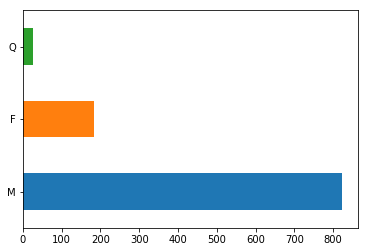

In [9]:
mental_df['Gender'].value_counts().plot(kind='barh')

Representation in the tech industry is extremely cis male. Queer people make up a marginal portion of workers in the tech industry.

In [10]:
mental_df['Gender'].value_counts()

M    822
F    184
Q     25
Name: Gender, dtype: int64

In [11]:
mental_df['Age'].dtype    

dtype('int64')

In [12]:
mental_df['Age'][0:10]

0     37
2     32
3     31
4     31
5     33
6     35
7     39
8     42
9     23
10    31
Name: Age, dtype: int64

In [13]:
mental_df['Age'].describe()

count    1.031000e+03
mean     9.699324e+07
std      3.114373e+09
min     -1.000000e+00
25%      2.700000e+01
50%      3.100000e+01
75%      3.500000e+01
max      1.000000e+11
Name: Age, dtype: float64

There seems to be a huge outlier skewing the data. Let's remove that.

In [14]:
mental_df['Age'].dtype

dtype('int64')

In [15]:
age_grt_than = mental_df['Age'] > 15
age_lss_than = mental_df['Age'] < 100
age_bool = age_grt_than & age_lss_than
mental_df = mental_df[age_bool]

In [16]:
mental_df['Age'].dtype

dtype('int64')

In [17]:
mental_df['Age'].describe()

count    1025.000000
mean       31.878049
std         7.151114
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        62.000000
Name: Age, dtype: float64

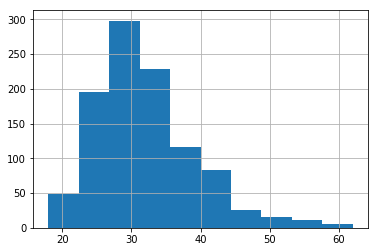

In [18]:
mental_df['Age'].hist()

The distribution for employee age in the tech industry is right-skewed. The majority of employees are between 20 and 40 years old. Those who are 50 and above are most likely top-level executives and/or CEOs.

For the following analyses, I will split the dataset by gender (male and female). The queer population will be omitted for the time being, since they make up less than 5% of employees. We will come back to them shortly. 

Since the male population dwarfs the female population by a factor of 4, we will randomly select 100 employees from both genders. Once we have our two dataframes, we can start exploring.

But first, let's clean up the dataframe we have now.

In [19]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1257
Data columns (total 27 columns):
Timestamp                    1025 non-null object
Age                          1025 non-null int64
Gender                       1025 non-null object
Country                      1025 non-null object
state                        600 non-null object
self_employed                1009 non-null object
family_history               1025 non-null object
treatment                    1025 non-null object
work_interfere               810 non-null object
no_employees                 1025 non-null object
remote_work                  1025 non-null object
tech_company                 1025 non-null object
benefits                     1025 non-null object
care_options                 1025 non-null object
wellness_program             1025 non-null object
seek_help                    1025 non-null object
anonymity                    1025 non-null object
leave                        1025 non-null obj

State, work_interfere, and comments have high percentages of missing values (41%, 20%, and 87% respectively). These columns will not add to the analysis, so we will drop them. 

In [20]:
drop_cols = ['state', 'work_interfere', 'comments']
mental_df = mental_df.drop(drop_cols, axis=1)
mental_df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,F,United States,NaN,No,Yes,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2,2014-08-27 11:29:44,32,M,Canada,NaN,No,No,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,M,United Kingdom,NaN,Yes,Yes,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,M,United States,NaN,No,No,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,2014-08-27 11:31:22,33,M,United States,NaN,Yes,No,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No


self_employed only has 18 rows (1.4%) of missing values. We can drop these rows. 

In [21]:
mental_df = mental_df.dropna()
mental_df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,M,United States,Yes,Yes,No,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,2014-08-27 11:35:08,36,M,France,Yes,Yes,No,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,2014-08-27 11:35:12,29,M,United States,No,Yes,Yes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,M,United States,Yes,No,No,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,M,United States,No,No,Yes,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [22]:
mental_df.shape

(1009, 24)

Now let's split the dataset by male and female.

In [23]:
male_bool = mental_df['Gender'] == 'M'
all_male_df = mental_df[male_bool]
all_male_df.shape

(807, 24)

In [24]:
female_bool = mental_df['Gender'] == 'F'
all_female_df = mental_df[female_bool]
all_female_df.shape

(180, 24)

Now let's randomly select 100 rows from each dataframe. 

In [25]:
sample_male_df = all_male_df.sample(100)
sample_male_df.shape

(100, 24)

In [26]:
sample_male_df.head(10)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
159,2014-08-27 12:43:40,25,M,United States,No,Yes,Yes,26-100,No,Yes,...,Don't know,Very easy,Maybe,No,Some of them,No,No,No,Don't know,Yes
336,2014-08-27 14:38:06,30,M,United Kingdom,No,No,Yes,26-100,No,Yes,...,Don't know,Don't know,Yes,Maybe,No,No,No,Maybe,Don't know,No
356,2014-08-27 14:54:23,33,M,United States,No,Yes,Yes,26-100,No,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No
706,2014-08-28 10:01:15,26,M,United States,No,No,No,26-100,No,Yes,...,Don't know,Don't know,Yes,Yes,Some of them,No,No,No,No,No
945,2014-08-29 00:05:07,39,M,United States,No,Yes,Yes,26-100,No,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,No,No,No
344,2014-08-27 14:41:16,33,M,United Kingdom,No,No,No,1-5,Yes,Yes,...,Don't know,Don't know,Yes,Maybe,No,No,No,Maybe,No,No
538,2014-08-27 17:52:31,27,M,United Kingdom,No,No,No,6-25,No,Yes,...,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
313,2014-08-27 14:25:54,26,M,United States,No,Yes,Yes,More than 1000,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
808,2014-08-28 13:57:01,27,M,United States,No,No,No,26-100,Yes,Yes,...,Don't know,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No
242,2014-08-27 13:32:48,33,M,United States,No,Yes,Yes,26-100,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


In [27]:
sample_female_df = all_female_df.sample(100)
sample_female_df.shape

(100, 24)

In [28]:
sample_female_df.head(10)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
341,2014-08-27 14:39:07,33,F,United States,No,Yes,No,26-100,Yes,Yes,...,Don't know,Very difficult,Yes,Maybe,Some of them,Some of them,No,Maybe,No,No
398,2014-08-27 15:25:41,32,F,United States,No,No,No,100-500,No,Yes,...,Don't know,Don't know,Maybe,No,No,Some of them,No,Maybe,Don't know,No
633,2014-08-28 02:49:34,34,F,United States,No,No,Yes,100-500,Yes,Yes,...,Don't know,Somewhat easy,Maybe,No,Some of them,Yes,No,No,Yes,No
1050,2014-08-29 11:32:44,26,F,United States,No,Yes,Yes,More than 1000,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes
1009,2014-08-29 09:46:56,44,F,United States,No,No,No,100-500,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,Don't know,No
178,2014-08-27 12:51:25,45,F,United States,No,No,Yes,1-5,No,Yes,...,Yes,Somewhat difficult,No,No,Yes,Yes,No,No,Yes,No
587,2014-08-27 21:55:28,29,F,United States,No,No,No,26-100,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,Don't know,Yes
486,2014-08-27 16:21:11,28,F,United States,No,Yes,Yes,26-100,No,Yes,...,Don't know,Don't know,Yes,Maybe,Some of them,No,No,Maybe,Don't know,No
912,2014-08-28 18:21:58,24,F,United Kingdom,No,Yes,Yes,6-25,Yes,Yes,...,Don't know,Very easy,No,No,Yes,Yes,No,No,Don't know,No
1225,2015-02-21 15:28:57,23,F,Ireland,No,No,Yes,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Some of them,No,Maybe,Don't know,No


Let's compare the age distributions of male and female employees in the tech industry.

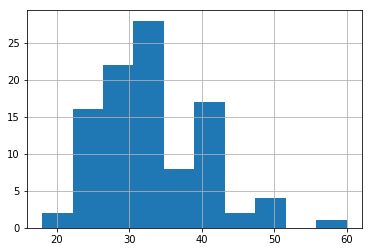

In [29]:
sample_male_df['Age'].hist()

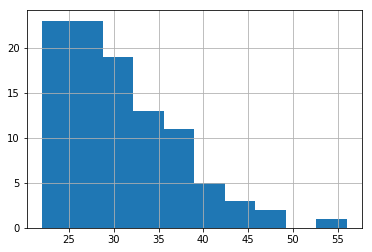

In [30]:
sample_female_df['Age'].hist()

Both distributions are right-skewed. The male distribution has a 10-year wider range, the oldest employees being in their 50s while the oldest female employees are in their 40s. Besides that, the distributions seem very similar.

Next, let's compare the percentage of men and women who sought treatment for a mental health condition.

In [31]:
treatment_map = {
    'Yes': True,
    'No': False
}

sample_male_df['treatment'] = sample_male_df['treatment'].map(treatment_map)
sample_male_df.head(10)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
159,2014-08-27 12:43:40,25,M,United States,No,Yes,True,26-100,No,Yes,...,Don't know,Very easy,Maybe,No,Some of them,No,No,No,Don't know,Yes
336,2014-08-27 14:38:06,30,M,United Kingdom,No,No,True,26-100,No,Yes,...,Don't know,Don't know,Yes,Maybe,No,No,No,Maybe,Don't know,No
356,2014-08-27 14:54:23,33,M,United States,No,Yes,True,26-100,No,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No
706,2014-08-28 10:01:15,26,M,United States,No,No,False,26-100,No,Yes,...,Don't know,Don't know,Yes,Yes,Some of them,No,No,No,No,No
945,2014-08-29 00:05:07,39,M,United States,No,Yes,True,26-100,No,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,No,No,No
344,2014-08-27 14:41:16,33,M,United Kingdom,No,No,False,1-5,Yes,Yes,...,Don't know,Don't know,Yes,Maybe,No,No,No,Maybe,No,No
538,2014-08-27 17:52:31,27,M,United Kingdom,No,No,False,6-25,No,Yes,...,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
313,2014-08-27 14:25:54,26,M,United States,No,Yes,True,More than 1000,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
808,2014-08-28 13:57:01,27,M,United States,No,No,False,26-100,Yes,Yes,...,Don't know,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No
242,2014-08-27 13:32:48,33,M,United States,No,Yes,True,26-100,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


In [32]:
sample_female_df['treatment'] = sample_female_df['treatment'].map(treatment_map)
sample_female_df.head(10)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
341,2014-08-27 14:39:07,33,F,United States,No,Yes,False,26-100,Yes,Yes,...,Don't know,Very difficult,Yes,Maybe,Some of them,Some of them,No,Maybe,No,No
398,2014-08-27 15:25:41,32,F,United States,No,No,False,100-500,No,Yes,...,Don't know,Don't know,Maybe,No,No,Some of them,No,Maybe,Don't know,No
633,2014-08-28 02:49:34,34,F,United States,No,No,True,100-500,Yes,Yes,...,Don't know,Somewhat easy,Maybe,No,Some of them,Yes,No,No,Yes,No
1050,2014-08-29 11:32:44,26,F,United States,No,Yes,True,More than 1000,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes
1009,2014-08-29 09:46:56,44,F,United States,No,No,False,100-500,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,Don't know,No
178,2014-08-27 12:51:25,45,F,United States,No,No,True,1-5,No,Yes,...,Yes,Somewhat difficult,No,No,Yes,Yes,No,No,Yes,No
587,2014-08-27 21:55:28,29,F,United States,No,No,False,26-100,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,Don't know,Yes
486,2014-08-27 16:21:11,28,F,United States,No,Yes,True,26-100,No,Yes,...,Don't know,Don't know,Yes,Maybe,Some of them,No,No,Maybe,Don't know,No
912,2014-08-28 18:21:58,24,F,United Kingdom,No,Yes,True,6-25,Yes,Yes,...,Don't know,Very easy,No,No,Yes,Yes,No,No,Don't know,No
1225,2015-02-21 15:28:57,23,F,Ireland,No,No,True,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Some of them,No,Maybe,Don't know,No


In [33]:
num_male_treatment = sample_male_df['treatment'].sum()
num_female_treatment = sample_female_df['treatment'].sum()

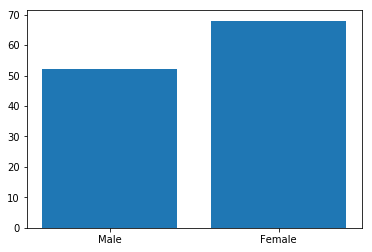

In [39]:
plt.bar(['Male', 'Female'], [num_male_treatment, num_female_treatment])
plt.show()

It seems like more female employees have sought treatment for mental conditions than male employees. Now let's see how easy it is for employees to take leave for mental health reasons. 

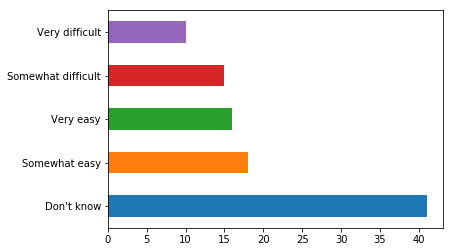

In [42]:
sample_male_df['leave'].value_counts().plot(kind='barh')

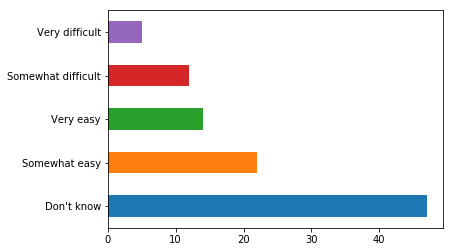

In [43]:
sample_female_df['leave'].value_counts().plot(kind='barh')